<img src="https://dollarsandsense.sg/wp-content/uploads/2020/09/nguyen-thu-hoai-a15b7LYrfbk-unsplash.jpg" alt="Alternative text" />

# Lab 5 Objective

Note that our Housing Data has a Binary (two-level) Categorical Variable named “CentralAir”, with values “Y” and “N”. In the previous sessions, we have seen some numeric variables in this dataset that are important to predict “SalePrice”. In this lab session, we will try to predict if a house has Central Air Conditioning or not using some other variables.

Typical steps to follow while building a supervised machine learning model on a given dataset:

o Partition the labeled dataset into two random portions – 80% to Train the model and 20% to Test the model.

o Fit the desired supervised machine learning model on the Train set to predict response using the predictors.

o Predict response using the predictors on the Test set using the machine learning model fit on the Train data.

o Check the Prediction Accuracy of the model on both the Train and the Test sets using the “Confusion Matrix”.

### Marks distribution:

4 points for Problem 1 2 points for train-test set and classification in (a) + 2 points for metrics in (b)

3 points for Problem 2 2 points for the two classifications + 1 point for comparison and justifications

3 points for Problem 3 2 points for printing samples in the leaf in (a) + 1 point for isolating FPs in (b)

### Importing the Essential Libraries and Data (New: DecisionTreeClassifier, plot_tree, confusion_matrix)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
sb.set()

house_prices = pd.read_csv("train.csv")
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
print(type(house_prices))
print(house_prices.shape)

<class 'pandas.core.frame.DataFrame'>
(1460, 81)


---

# Problem 1: Predicting CentralAir using SalePrice

In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy.

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of max depth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.

b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?

--- 

### Hints and Pointers:

o If you take just the first 80% of the data as train and the next 20% as test, it may not be the best train test split.

o If you want to change the max depth of the tree, check the input parameters needed to instantiate the model.

o Think about the accuracy metrics for a tree carefully to determine which model is better and in which metrics.

---
## Crafting the Classification Tree and Binary Metric Functions:
To save time and code space, define the function classificationtree() with all the required parameters.

The classification function crafts the classification tree and prints out the tree itself along with the confusion matrices and the classification metrics for easier comparison.

In [20]:
def classificationtree(X,y,df,depth):
    
    X = pd.DataFrame(df[X])
    y = pd.DataFrame(df[y])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    dectree = DecisionTreeClassifier(max_depth=depth)

    # Train the Decision Tree Classifier model
    dectree.fit(X_train, y_train)
    
    f = plt.figure(figsize=(20,20))
    plot_tree(dectree, filled=True, rounded=True, feature_names=[X], class_names=["No","Yes"])
    
    # Predict CentralAir corresponding to YearBuilt_train (X_train)
    f, axes = plt.subplots(1,figsize=(4, 4))
    train_pred = dectree.predict(X_train)
    print("Train Classification Accuracy \t:", dectree.score(X_train, y_train))
    sb.heatmap(confusion_matrix(y_train, train_pred),annot=True,fmt=".0f",annot_kws={"size":18})

    # Predict CentralAir corresponding to YearBuilt_test (X_test)
    f, axes = plt.subplots(figsize=(4, 4))
    test_pred = dectree.predict(X_test)
    print("Test Classification Accuracy \t:", dectree.score(X_test,y_test))
    sb.heatmap(confusion_matrix(y_test,test_pred),annot=True,fmt=".0f",annot_kws={"size": 18})
    
    print("\n")
    
    # print classification metric
    [TPR_train, FPR_train] = binary_metric(y_train,train_pred)
    [TPR_test, FPR_test] = binary_metric(y_test,test_pred)
    print("True Positive Rate for train\t:", [TPR_train, FPR_train][0])
    print("False Positive Rate for train\t:", [TPR_train, FPR_train][1])
    print("True Positive Rate for test\t:", [TPR_test, FPR_test][0])
    print("False Positive Rate for test\t:", [TPR_test, FPR_test][1])

# function to print TN, FN, TP, FP for a binary classification
def binary_metric(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR

### Decision Tree (Max Depth = 2) - Predicting CentralAir using SalePrice

We will start by setting up a simple Classification Problem. Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python. Import the `DecisionTreeClassifier` model from `sklearn.tree`.

Train the Decision Tree Classifier model `dectree` using the Train Set.   
Use `X_train` as *Predictor* and `y_train` as *Response*.

Response Variable: **CentralAir** (y)    
Predictor Feature: **SalePrice** (X)

Extract the variables and the associated data as Pandas `DataFrame`.

Train Classification Accuracy 	: 0.9375
Test Classification Accuracy 	: 0.952054794520548


True Positive Rate for train	: 1.0
False Positive Rate for train	: 0.9012345679012346
True Positive Rate for test	: 0.9964028776978417
False Positive Rate for test	: 0.9285714285714286


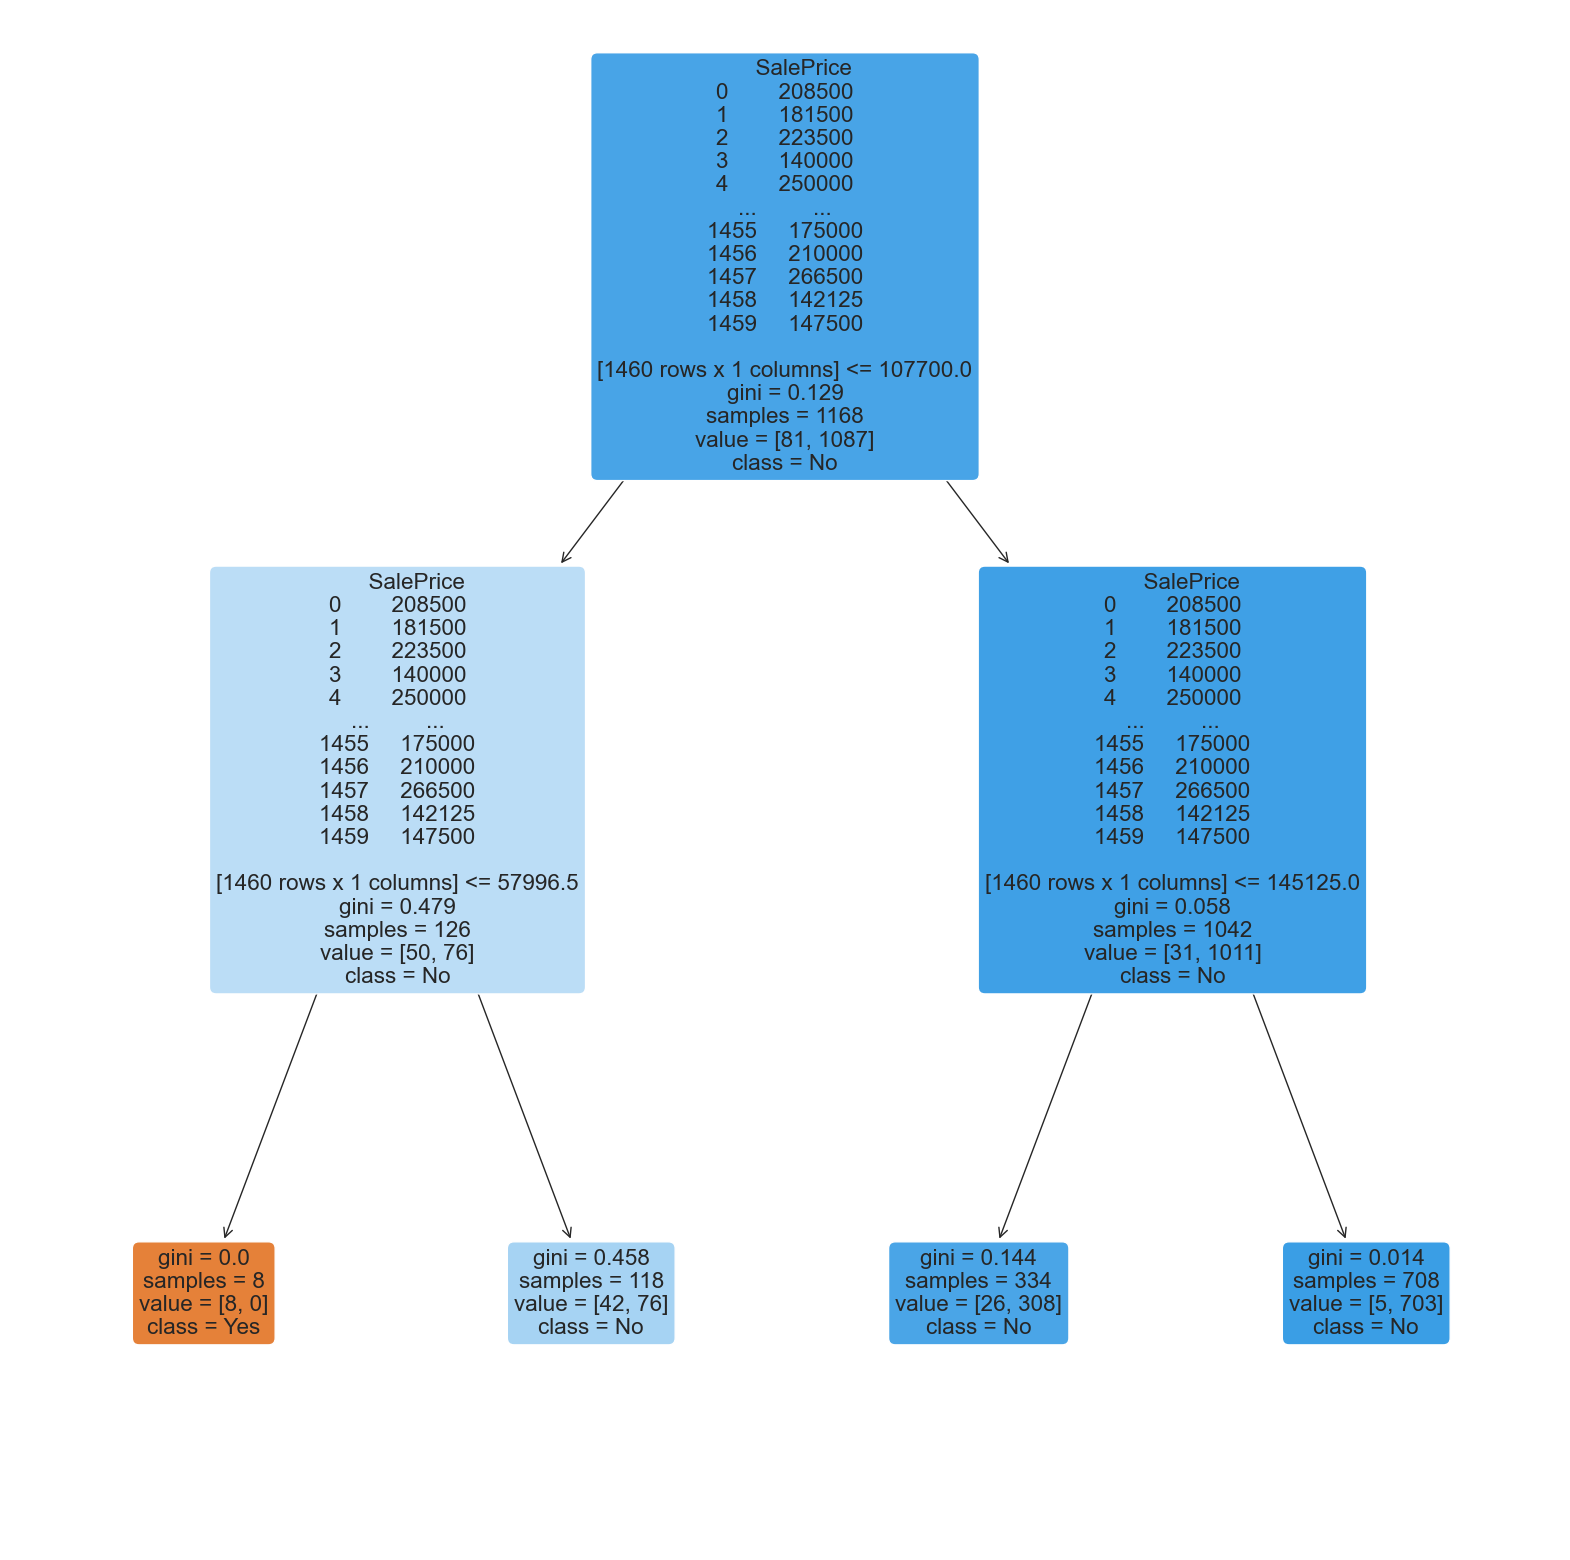

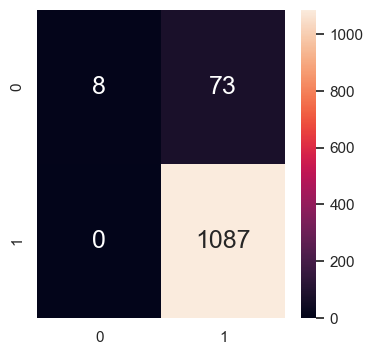

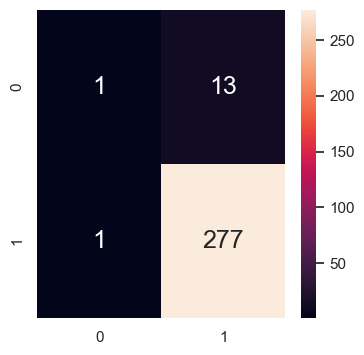

In [4]:
classificationtree(X='SalePrice',y='CentralAir', df=house_prices, depth=2)

### Decision Tree (Max Depth = 4) - Predicting CentralAir using SalePrice
Using depth 4 instead of 2.

Train Classification Accuracy 	: 0.9443493150684932
Test Classification Accuracy 	: 0.9486301369863014


True Positive Rate for train	: 0.9981634527089073
False Positive Rate for train	: 0.7974683544303798
True Positive Rate for test	: 0.9927536231884058
False Positive Rate for test	: 0.8125


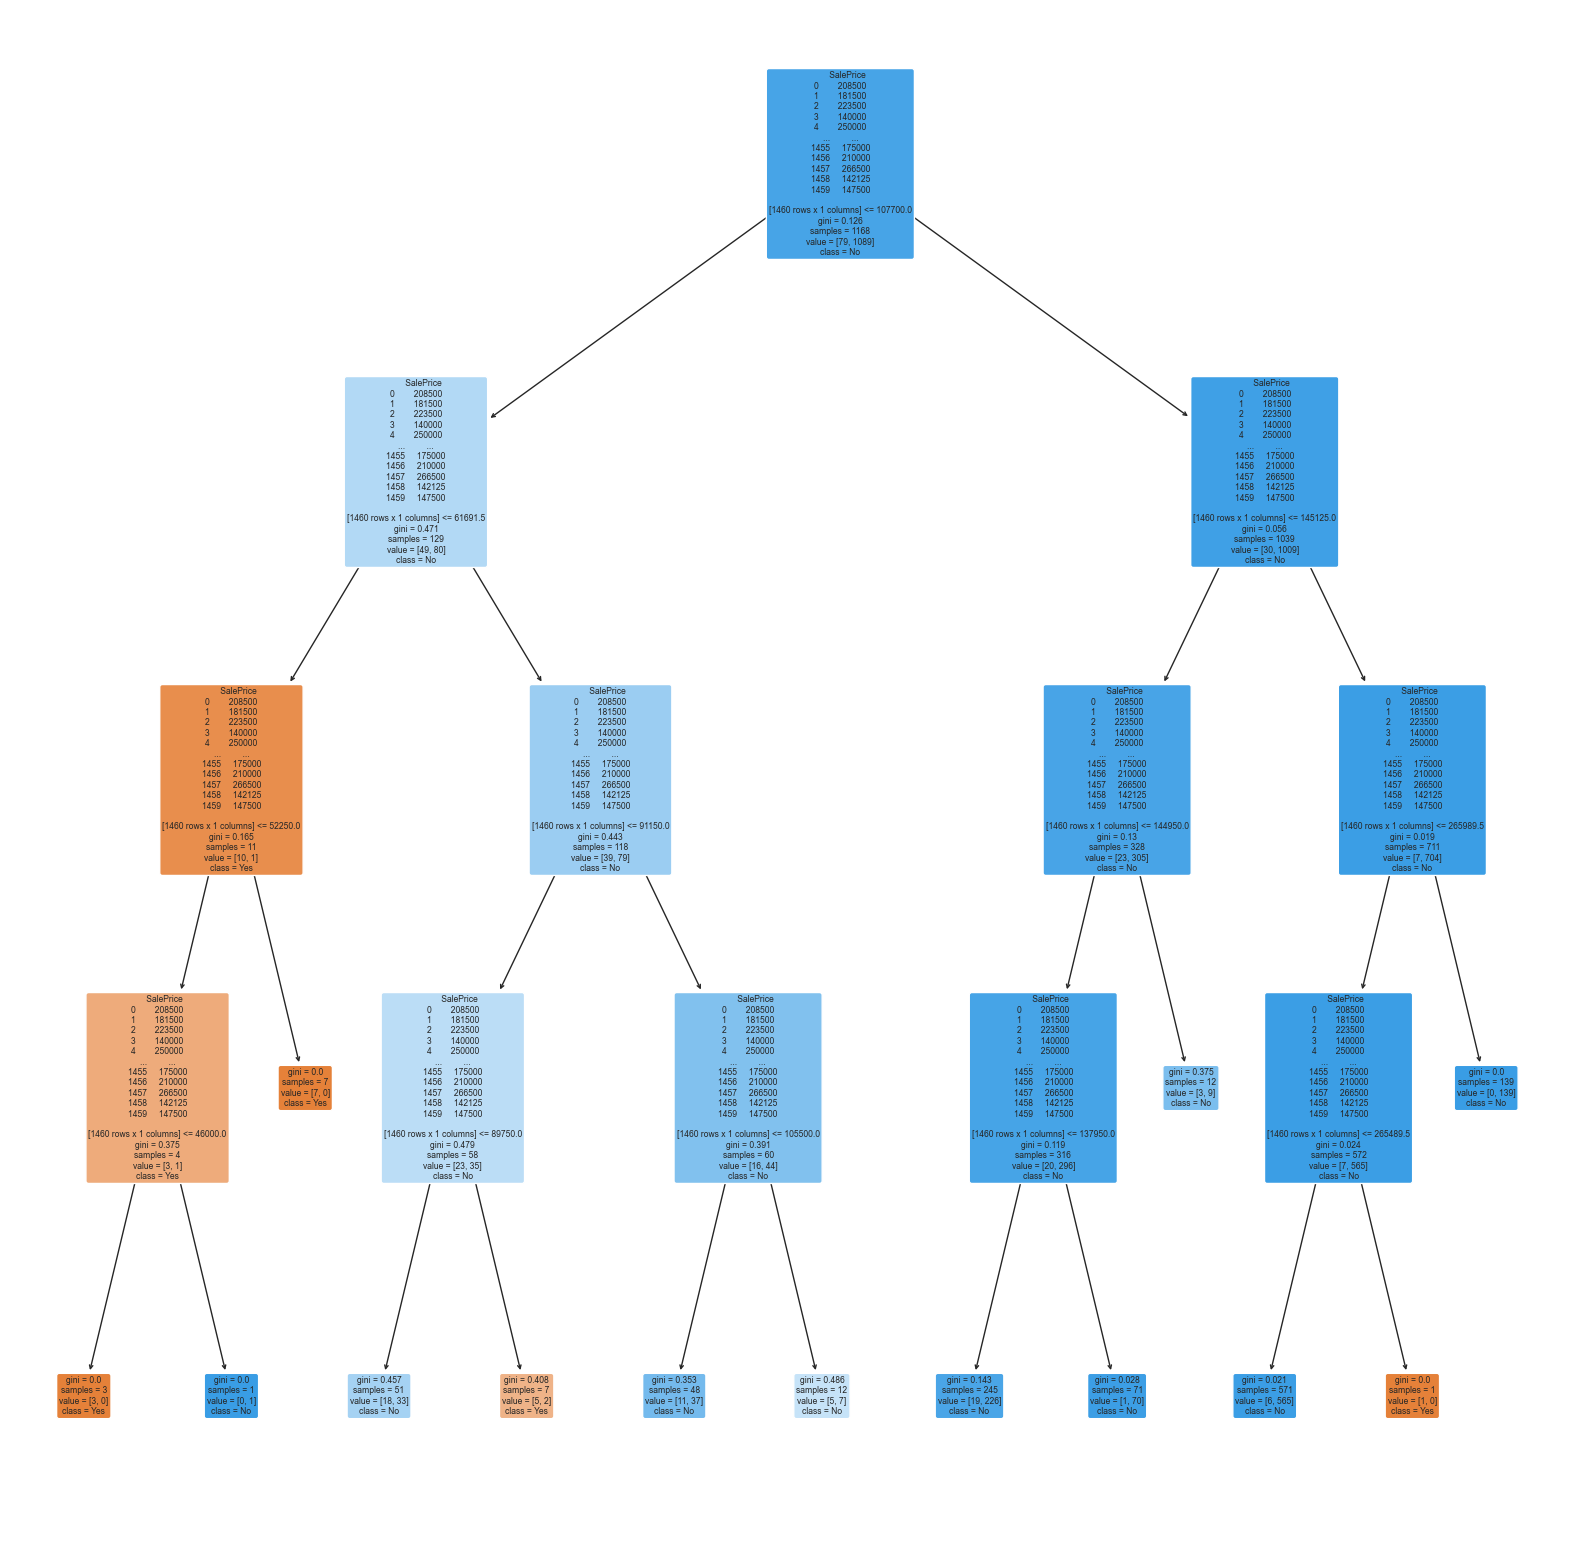

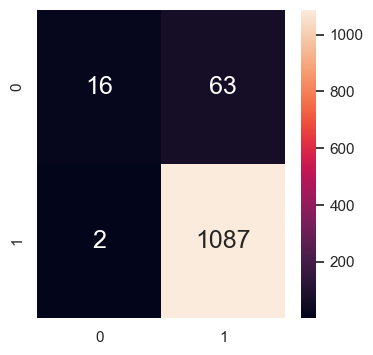

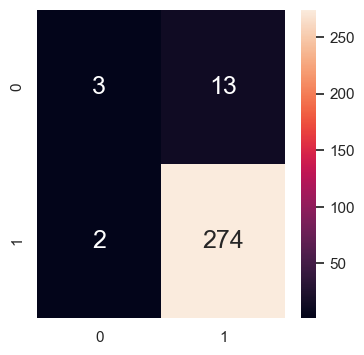

In [5]:
classificationtree(X='SalePrice',y='CentralAir', df=house_prices, depth=4)

The Model for the tree with depth=2 is better as it has a higher classification accuracy for the test set. As for the confusion matrix: 

# Problem 2: Predicting CentralAir using Other Variables

Following the steps from the previous problem, build **2 new uni-variate Classification Tree models (of max depth 4)** to predict **CentralAir** using the variables **OverallQual** and **YearBuilt**. Justify which of the variables is the best predictor.

#### Hints and Pointers:

o Same as Problem 1, just on other variables. You can compare models using the metrics you are printing anyway.     
o Optional: You may think of writing a simple Python function to do classification on variable(s) in a given dataset.

---

## Tackling CentralAir with OverallQual first:

Response Variable: **CentralAir** (y)    
Predictor Feature: **OverallQual** (X)   

Extract the variables and the associated data as Pandas `DataFrame`.

### Goodness of fit of the Model for Tree Depth=4 (CentralAir & OverallQual)

Train Classification Accuracy 	: 0.9366438356164384
Test Classification Accuracy 	: 0.952054794520548


True Positive Rate for train	: 0.9944852941176471
False Positive Rate for train	: 0.85
True Positive Rate for test	: 0.9891696750902527
False Positive Rate for test	: 0.7333333333333333


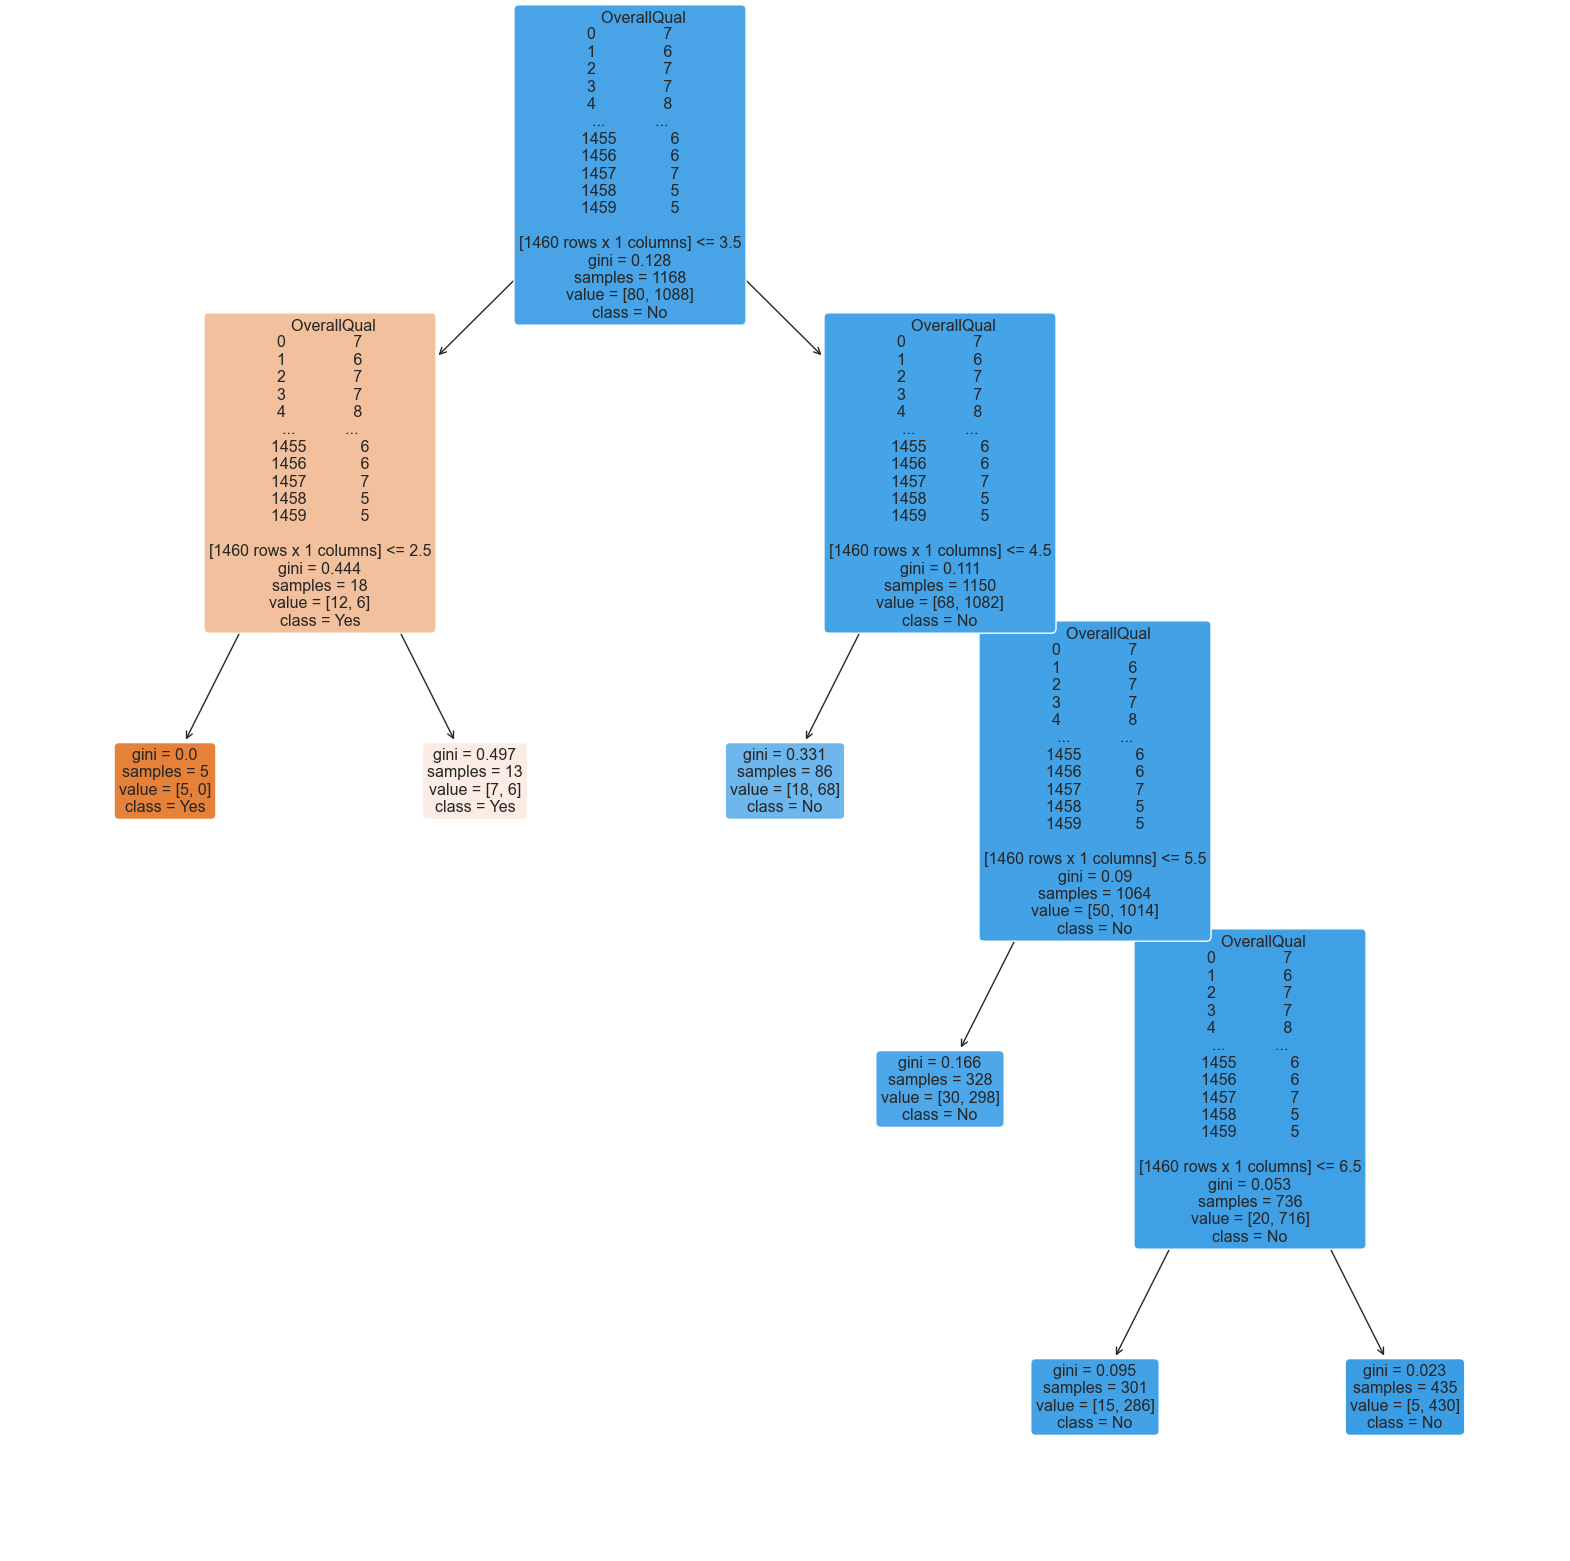

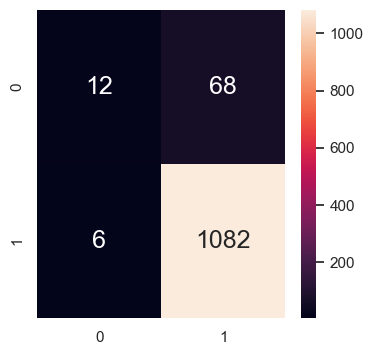

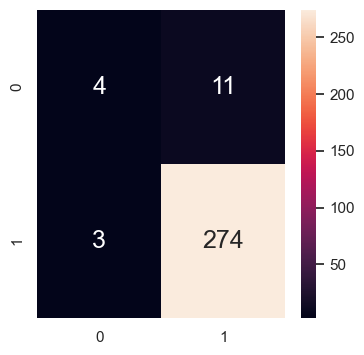

In [6]:
classificationtree(X='OverallQual',y='CentralAir', df=house_prices, depth=4)

## Tackling CentralAir with YearBuilt:

Response Variable: **CentralAir** (y)    
Predictor Feature: **YearBuilt** (X)   

Extract the variables and the associated data as Pandas `DataFrame`.

Train Classification Accuracy 	: 0.9375
Test Classification Accuracy 	: 0.9315068493150684


True Positive Rate for train	: 1.0
False Positive Rate for train	: 0.9733333333333334
True Positive Rate for test	: 1.0
False Positive Rate for test	: 1.0


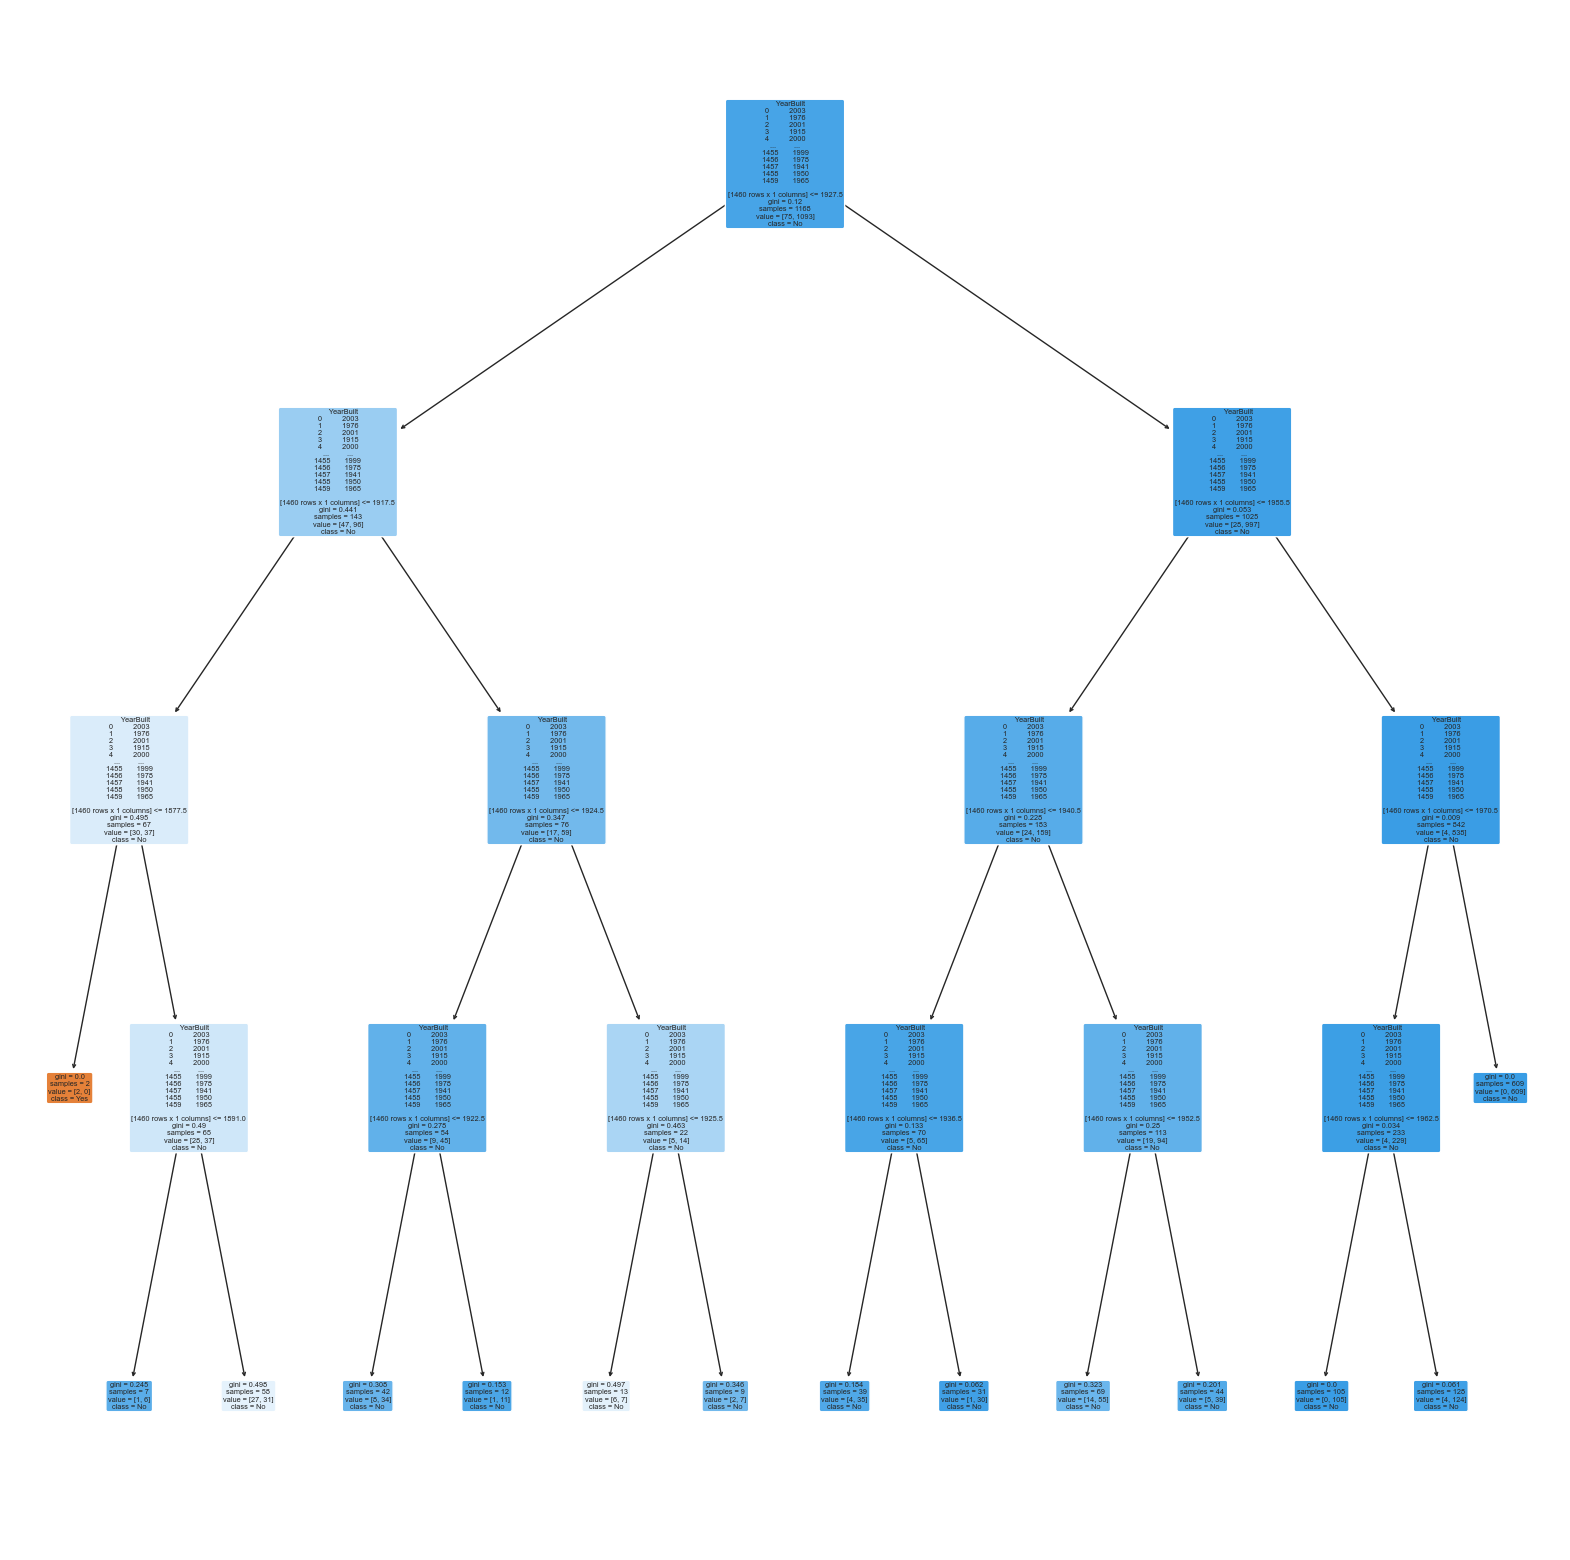

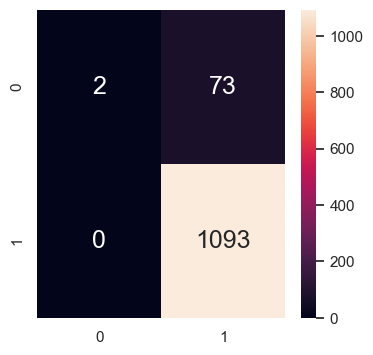

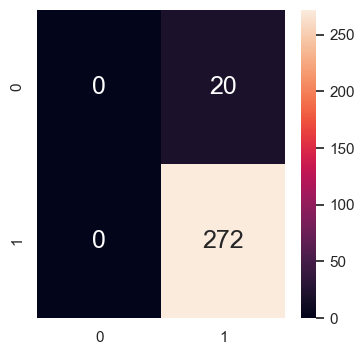

In [7]:
classificationtree(X='YearBuilt',y='CentralAir', df=house_prices, depth=4)

Therefore, comparing the 2 variables, as YearBuilt has a higher train and test classification accuracy, it is the better predictor.

# Problem 3: Understanding the Misclassified Samples
In this problem, you will consider finer details of the tree model and try to isolate the misclassified samples for a model.

(a) Print the Classification Tree of max depth 4 that you fit in Problem 1(a). Note that each leaf node of your tree represents a specific partition of your training data, based on certain conditions given by the splits in the tree. Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.

(b) Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a).

### Hints and Pointers:
o In Part (a), you may print the model in Problem 1(a), or fit the max depth 4 classification tree model once again.

o You may simply “observe” which leaf node has the maximum number of False Positives; no need to code for it.

o Think about how data points (samples) end up in a leaf node based on tree splits; it will help you isolate samples.

o Part (b) is a simple continuation of part (a), where you need to “filter” out the False Positives from the samples.

---
## Printing the Classification from Problem 1(a): (Depth = 4)

Train Classification Accuracy 	: 0.9417808219178082
Test Classification Accuracy 	: 0.958904109589041


True Positive Rate for train	: 0.998158379373849
False Positive Rate for train	: 0.8048780487804879
True Positive Rate for test	: 0.996415770609319
False Positive Rate for test	: 0.8461538461538461


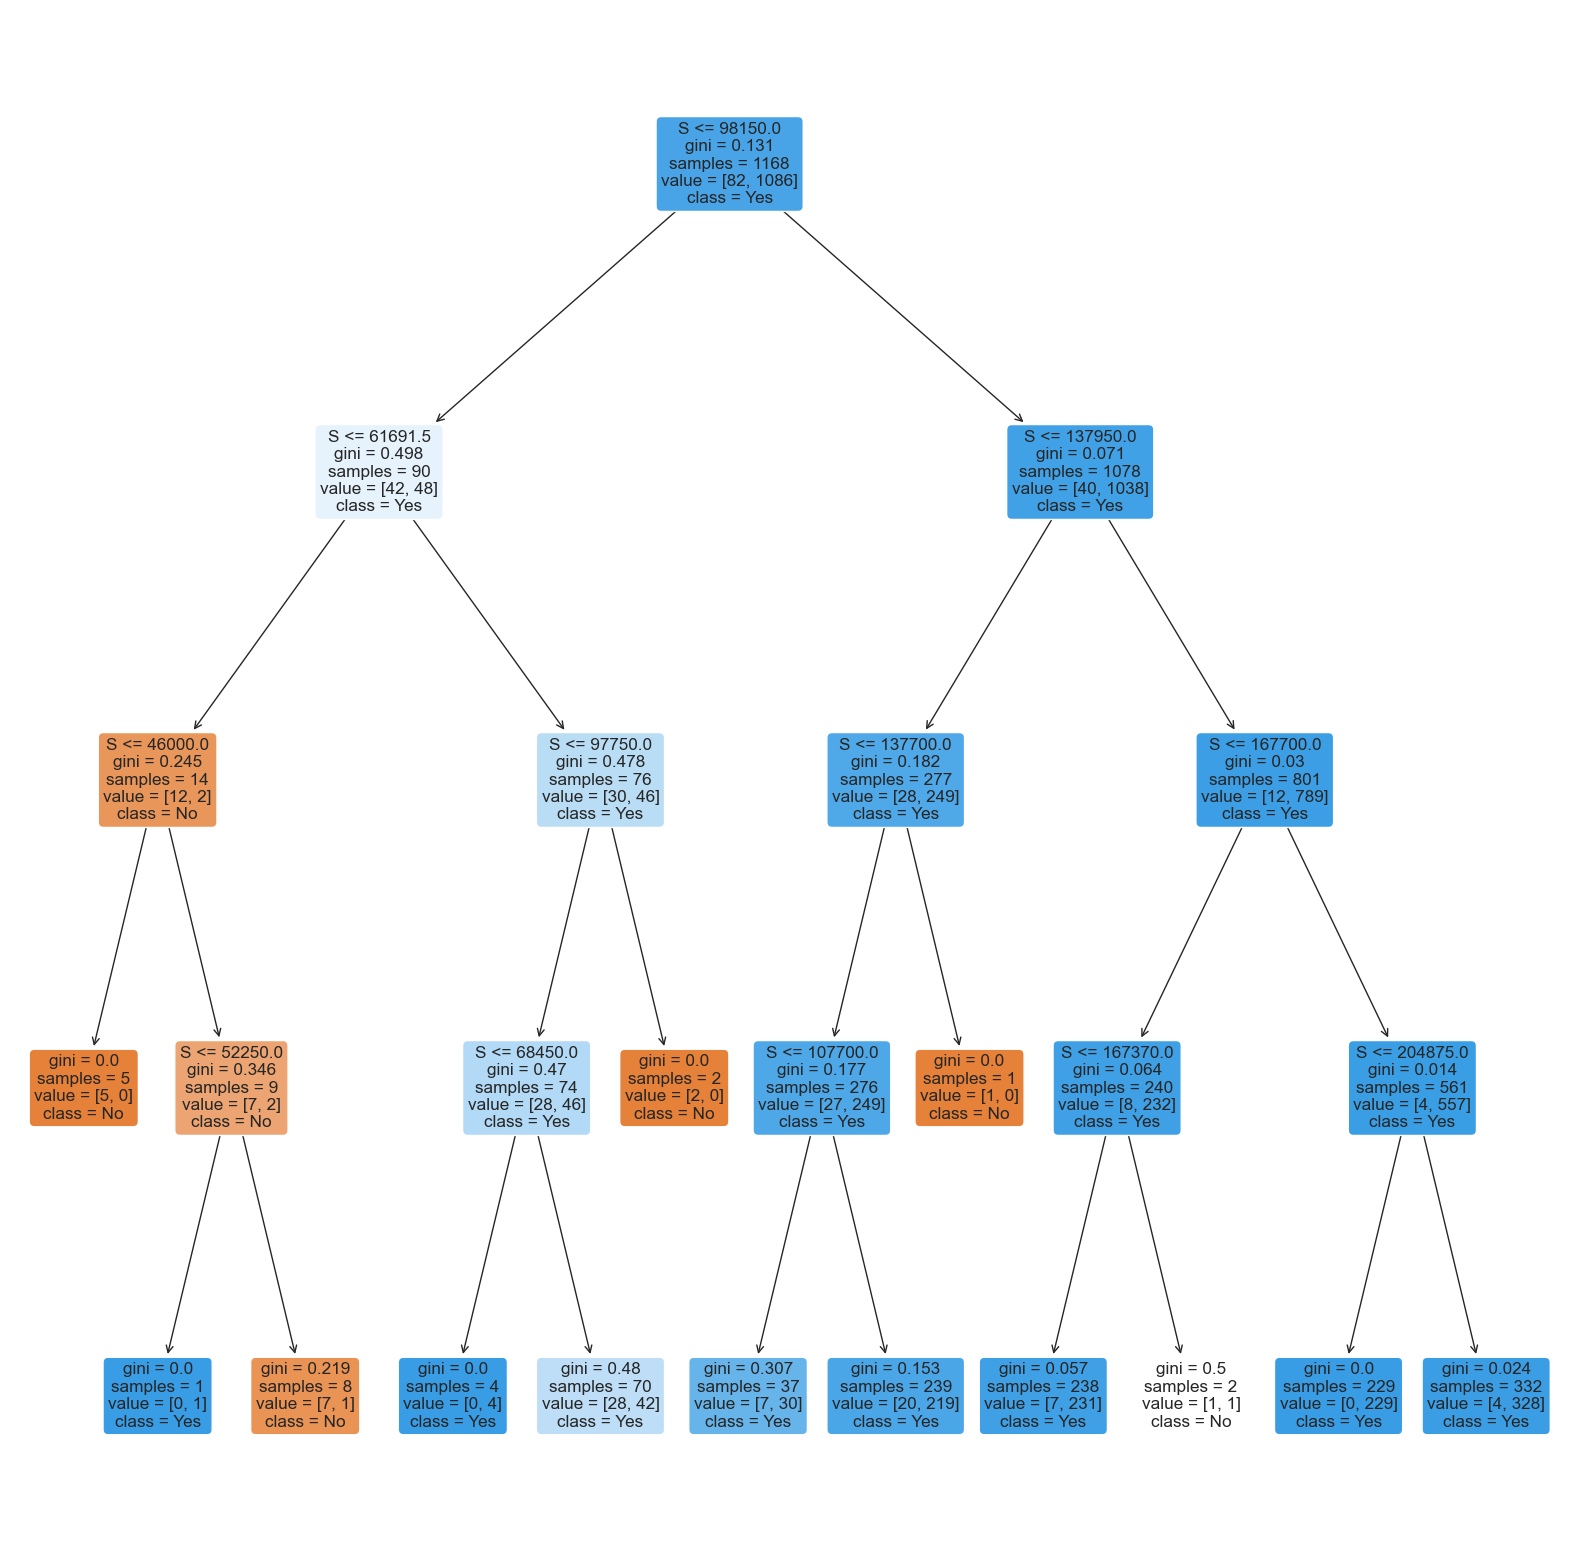

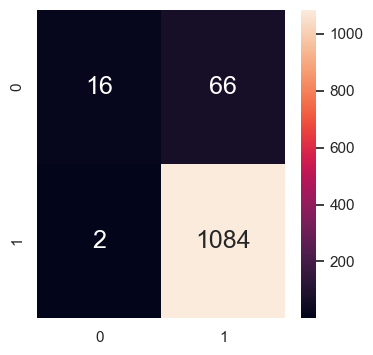

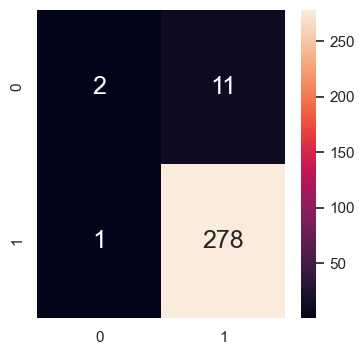

In [19]:
# extract relevant dataframes
SalePrice = pd.DataFrame(house_prices['SalePrice'])
CentralAir = pd.DataFrame(house_prices['CentralAir'])

# split the CentralAir-SalePrice dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(SalePrice, CentralAir, test_size = 0.2)

dectree = DecisionTreeClassifier(max_depth=4)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

f = plt.figure(figsize=(20,20))
plot_tree(dectree, filled=True, rounded=True, feature_names="SalePrice", class_names=["No","Yes"])

# Predict CentralAir corresponding to YearBuilt_train (X_train)
f, axes = plt.subplots(1,figsize=(4, 4))
train_pred = dectree.predict(X_train)
print("Train Classification Accuracy \t:", dectree.score(X_train, y_train))
sb.heatmap(confusion_matrix(y_train, train_pred),annot=True,fmt=".0f",annot_kws={"size":18})

# Predict CentralAir corresponding to YearBuilt_test (X_test)
f, axes = plt.subplots(figsize=(4, 4))
test_pred = dectree.predict(X_test)
print("Test Classification Accuracy \t:", dectree.score(X_test,y_test))
sb.heatmap(confusion_matrix(y_test,test_pred),annot=True,fmt=".0f",annot_kws={"size": 18})

print("\n")

# print classification metric
[TPR_train, FPR_train] = binary_metric(y_train,train_pred)
[TPR_test, FPR_test] = binary_metric(y_test,test_pred)
print("True Positive Rate for train\t:", [TPR_train, FPR_train][0])
print("False Positive Rate for train\t:", [TPR_train, FPR_train][1])
print("True Positive Rate for test\t:", [TPR_test, FPR_test][0])
print("False Positive Rate for test\t:", [TPR_test, FPR_test][1])

### b) Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a).

In [17]:
total_train = X_train.join(y_train).reindex(X_train.index)

# Filter to the target leaf node
filter_rule = (79450.0 < total_train["SalePrice"]) & (total_train["SalePrice"] <= 98150)
filter_set = total_train[filter_rule]

# Check the data points after filter
print("Filtered set :", filter_set.shape)
print("CentralAir in the Leaf Node")
print(filter_set["CentralAir"].value_counts())

# Extract the False Positives
fp_set = filter_set[filter_set['CentralAir'] == 'N']
fp_set

Filtered set : (60, 2)
CentralAir in the Leaf Node
Y    42
N    18
Name: CentralAir, dtype: int64


,SalePrice,CentralAir
39,82000,N
1144,80000,N
676,87000,N
342,87500,N
1035,84000,N
1412,90000,N
1137,94000,N
325,87000,N
125,84500,N
912,88000,N


Answer: The 3rd leaf node from the left in level 4 of the tree has the highest number of false positives when looking at index 0 of the value array as compared to the rest of the leaf nodes. Given there are 64 data points (25 negatives and 39 positives) that are classified as 'Y' being positive, the 25 negatives are predicted wrongly as positives.


Class = Y means positive, or in our context CentralAir = True

Class = N means negative, or in our context CentralAir = False

Here we are finding out the false negatives (predicted positive, while actual is negative), which narrows to finding data points that has CentralAir = False in Class = Y. Hence, we can ignore Class = N.


In order to filter out the false positives, we need to trace the tree for the underlying conditions for the split.
First split at root is SalePrice <= 107750.0, as we go towards the left branch of the tree.

Second split at level 1 is SalePrice > 79450.0 as we go towards the right branch at this level.

Third split at level 2 is SalePrice <= 106125.0 as we go towards the left branch at this level.

Fourth split at level 3 is SalePrice <= 98150.0 as we go towards the left branch at this stage.

With the splits combined, our filtering logic to reach the target leaf node is 79450.0 < SalePrice <= 98150.0.